In [1]:
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [4]:
w = torch.ones(())
b = torch.zeros(())

In [5]:
t_p = model(t_u, w, b)

loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [6]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)

print(x.shape)
print(y.shape)
print(z.shape)
print(a.shape)

print(x)
print(y)
print(z)
print(a)

torch.Size([])
torch.Size([3, 1])
torch.Size([1, 3])
torch.Size([2, 1, 1])
tensor(1.)
tensor([[1.],
        [1.],
        [1.]])
tensor([[1., 1., 1.]])
tensor([[[1.]],

        [[1.]]])


In [7]:
print("x * y", (x * y).shape)
print("y * z", (y * z).shape)
print("y * z * a", (y * z * a).shape)

x * y torch.Size([3, 1])
y * z torch.Size([3, 3])
y * z * a torch.Size([2, 3, 3])


In [8]:
print("x * y", (x * y))
print("y * z", (y * z))
print("y * z * a", (y * z * a))

x * y tensor([[1.],
        [1.],
        [1.]])
y * z tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
y * z * a tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


Gradient

In [9]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None: # Before computing the gradient for the current epoch, it ensures that any previous gradients stored in params.grad are reset to zero.
      params.grad.zero_() # Why? Gradients in PyTorch accumulate by default, so clearing them is necessary to avoid incorrect updates.

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    # Check for nan loss
    if torch.isnan(loss):
        print(f"Loss is nan at epoch {epoch}. Breaking the loop.")
        break  # Stop training if loss becomes nan

    loss.backward() # Computes gradients of the loss with respect to the model parameters using backpropagation.

    with torch.no_grad():  # torch.no_grad(): Temporarily disables gradient tracking for performance and ensures no accidental modification of gradients during parameter updates.
      params -= learning_rate * params.grad

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params

In [10]:
training_loop(5000, 1e-2, torch.tensor([1.0, 0.0], requires_grad=True), t_u, t_c)

Loss is nan at epoch 23. Breaking the loop.


tensor([nan, inf], requires_grad=True)

In [11]:
t_c = t_c / 10
t_u = t_u / 10

In [12]:
training_loop( 5000, 1e-2, torch.tensor([1.0, 0.0], requires_grad=True), t_u, t_c)

Epoch 500, Loss 0.070306
Epoch 1000, Loss 0.036770
Epoch 1500, Loss 0.030645
Epoch 2000, Loss 0.029526
Epoch 2500, Loss 0.029322
Epoch 3000, Loss 0.029285
Epoch 3500, Loss 0.029278
Epoch 4000, Loss 0.029277
Epoch 4500, Loss 0.029277
Epoch 5000, Loss 0.029276


tensor([ 0.5367, -1.7302], requires_grad=True)

In [13]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

In [14]:
def training_loop_with_optim(n_epochs, optimzer, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None: # Before computing the gradient for the current epoch, it ensures that any previous gradients stored in params.grad are reset to zero.
      params.grad.zero_() # Why? Gradients in PyTorch accumulate by default, so clearing them is necessary to avoid incorrect updates.

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)

    # Check for nan loss
    if torch.isnan(loss):
        print(f"Loss is nan at epoch {epoch}. Breaking the loop.")
        break  # Stop training if loss becomes nan

    optimzer.zero_grad()

    loss.backward() # Computes gradients of the loss with respect to the model parameters using backpropagation.

    optimzer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

  return params

In [15]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr=1e-2)

training_loop_with_optim(5000, optimizer, t_u, t_c)

Epoch 500, Loss 0.070306
Epoch 1000, Loss 0.036770
Epoch 1500, Loss 0.030645
Epoch 2000, Loss 0.029526
Epoch 2500, Loss 0.029322
Epoch 3000, Loss 0.029285
Epoch 3500, Loss 0.029278
Epoch 4000, Loss 0.029277
Epoch 4500, Loss 0.029277
Epoch 5000, Loss 0.029276


tensor([ 0.5367, -1.7302], requires_grad=True)

### Validation dataset

In [16]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

In [17]:
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [18]:
train_t_c = t_c[train_indices]
train_t_u = t_u[train_indices]

val_t_c = t_c[val_indices]
val_t_u = t_u[val_indices]

In [19]:
def training_loop_with_validation(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    val_t_p = model(val_t_u, *params)
    val_loss = loss_fn(val_t_p, val_t_c)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training Loss {train_loss.item():.4f}, Validation Loss {val_loss.item():.4f}")

  return params

In [20]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop_with_validation(3000, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c)

Epoch 1, Training Loss 17.5343, Validation Loss 18.1093
Epoch 2, Training Loss 3.1704, Validation Loss 2.6860
Epoch 3, Training Loss 0.7793, Validation Loss 0.3268
Epoch 500, Training Loss 0.0662, Validation Loss 0.0236
Epoch 1000, Training Loss 0.0362, Validation Loss 0.0225
Epoch 1500, Training Loss 0.0324, Validation Loss 0.0222
Epoch 2000, Training Loss 0.0319, Validation Loss 0.0221
Epoch 2500, Training Loss 0.0319, Validation Loss 0.0220
Epoch 3000, Training Loss 0.0319, Validation Loss 0.0220


tensor([ 0.5308, -1.7263], requires_grad=True)

### Autograd nits and switching it off

In [21]:
def training_loop_with_validation(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
  for epoch in range(1, n_epochs + 1):
    train_t_p = model(train_t_u, *params)
    train_loss = loss_fn(train_t_p, train_t_c)

    with torch.no_grad():  # The with torch.no_grad(): block is used in this context to temporarily disable gradient computation. Here's why it is important in this function
      val_t_p = model(val_t_u, *params)
      val_loss = loss_fn(val_t_p, val_t_c)
      assert val_loss.requires_grad == False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch <= 3 or epoch % 500 == 0:
      print(f"Epoch {epoch}, Training Loss {train_loss.item():.4f}, Validation Loss {val_loss.item():.4f}")

  return params

In [22]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop_with_validation(3000, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c)

Epoch 1, Training Loss 17.5343, Validation Loss 18.1093
Epoch 2, Training Loss 3.1704, Validation Loss 2.6860
Epoch 3, Training Loss 0.7793, Validation Loss 0.3268
Epoch 500, Training Loss 0.0662, Validation Loss 0.0236
Epoch 1000, Training Loss 0.0362, Validation Loss 0.0225
Epoch 1500, Training Loss 0.0324, Validation Loss 0.0222
Epoch 2000, Training Loss 0.0319, Validation Loss 0.0221
Epoch 2500, Training Loss 0.0319, Validation Loss 0.0220
Epoch 3000, Training Loss 0.0319, Validation Loss 0.0220


tensor([ 0.5308, -1.7263], requires_grad=True)

Torch.NN

In [54]:
import torch

In [55]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]


t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_c = t_c / 10
t_u = t_u / 10

In [56]:
t_c

tensor([[ 0.0500],
        [ 1.4000],
        [ 1.5000],
        [ 2.8000],
        [ 1.1000],
        [ 0.8000],
        [ 0.3000],
        [-0.4000],
        [ 0.6000],
        [ 1.3000],
        [ 2.1000]])

In [57]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_c = t_c[train_indices]
train_t_u = t_u[train_indices]

val_t_c = t_c[val_indices]
val_t_u = t_u[val_indices]

In [58]:
val_t_c

tensor([[1.4000],
        [1.3000]])

In [59]:
import torch.nn as nn
import torch.optim as optim

linear_model = nn.Linear(1, 1)

optimizer = optim.SGD(linear_model.parameters(), lr=1e-2) # this method call replaces [params]


In [60]:
linear_model.parameters()

<generator object Module.parameters at 0x7c77c116d9a0>

In [61]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.9991]], requires_grad=True),
 Parameter containing:
 tensor([-0.3387], requires_grad=True)]

In [62]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
  for epoch in range(1, n_epochs + 1):
    t_p_train = model(t_u_train)
    loss_train = loss_fn(t_p_train, t_c_train)

    t_p_val = model(t_u_val)
    loss_val = loss_fn(t_p_val, t_c_val)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()

    if epoch == 1 or epoch % 1000 == 0:
      print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
            f" Validation loss {loss_val.item():.4f}")

In [63]:
linear_model = nn.Linear(1, 1)

optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(10000, optimizer, linear_model, nn.MSELoss(), train_t_u, val_t_u, train_t_c, val_t_c)

Epoch 1, Training loss 21.0110, Validation loss 24.6163
Epoch 1000, Training loss 0.0310, Validation loss 0.0300
Epoch 2000, Training loss 0.0288, Validation loss 0.0321
Epoch 3000, Training loss 0.0288, Validation loss 0.0324
Epoch 4000, Training loss 0.0288, Validation loss 0.0325
Epoch 5000, Training loss 0.0288, Validation loss 0.0325
Epoch 6000, Training loss 0.0288, Validation loss 0.0325
Epoch 7000, Training loss 0.0288, Validation loss 0.0325
Epoch 8000, Training loss 0.0288, Validation loss 0.0325
Epoch 9000, Training loss 0.0288, Validation loss 0.0325
Epoch 10000, Training loss 0.0288, Validation loss 0.0325


In [64]:
linear_model.weight

Parameter containing:
tensor([[0.5419]], requires_grad=True)

In [65]:
linear_model.bias

Parameter containing:
tensor([-1.7473], requires_grad=True)

In [66]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

In [67]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [68]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [69]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

In [70]:
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [71]:
for name, param in seq_model.named_parameters():
  print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [72]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2241], requires_grad=True)

In [77]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(10000, optimizer, seq_model, nn.MSELoss(), train_t_u, val_t_u, train_t_c, val_t_c)

Epoch 1, Training loss 2.1554, Validation loss 2.1650
Epoch 1000, Training loss 0.7886, Validation loss 0.0914
Epoch 2000, Training loss 0.6889, Validation loss 0.0711
Epoch 3000, Training loss 0.4225, Validation loss 0.0321
Epoch 4000, Training loss 0.1991, Validation loss 0.0159
Epoch 5000, Training loss 0.1009, Validation loss 0.0207
Epoch 6000, Training loss 0.0630, Validation loss 0.0285
Epoch 7000, Training loss 0.0473, Validation loss 0.0328
Epoch 8000, Training loss 0.0392, Validation loss 0.0345
Epoch 9000, Training loss 0.0343, Validation loss 0.0352
Epoch 10000, Training loss 0.0309, Validation loss 0.0354


In [79]:
print('output', seq_model(val_t_u))
print('answer', val_t_c)
print('hidden', seq_model.hidden_linear.weight.grad)

output tensor([[1.2931],
        [1.5437]], grad_fn=<AddmmBackward0>)
answer tensor([[1.4000],
        [1.3000]])
hidden tensor([[-0.0013],
        [ 0.0008],
        [-0.0032],
        [-0.0016],
        [-0.0014],
        [ 0.0002],
        [ 0.0028],
        [ 0.0002]])


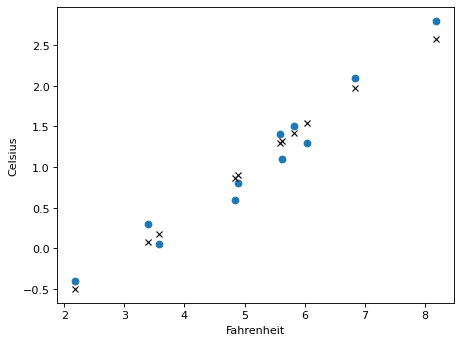

In [84]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 60.).unsqueeze(1)

fig = plt.figure(dpi=80)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

# plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(t_u).detach().numpy(), 'kx')